<a href="https://colab.research.google.com/github/garestrear/ninja-pythonist/blob/master/Scaling_graphs_with_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Escalando las gráficas y clusterizando



In [0]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
lista = np.array([[0,-6,-7,-4,0],[0, 1, 0, -1, 0],[0, 0.5, 1, 0.5, 0],[0, -1, 0, 1,0],[0,2,7,1.5,0],[0,-7,-8,-5,0]])
x = np.linspace(0, 10, 5)

In [0]:
lista

array([[ 0. , -6. , -7. , -4. ,  0. ],
       [ 0. ,  1. ,  0. , -1. ,  0. ],
       [ 0. ,  0.5,  1. ,  0.5,  0. ],
       [ 0. , -1. ,  0. ,  1. ,  0. ],
       [ 0. ,  2. ,  7. ,  1.5,  0. ],
       [ 0. , -7. , -8. , -5. ,  0. ]])

## Gráficas con datos originales

<function matplotlib.pyplot.show>

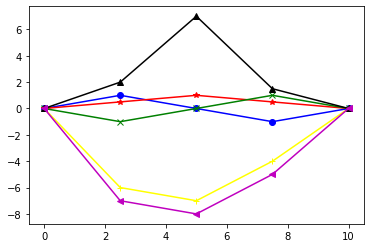

In [0]:
plt.plot(x, lista[0], '-+', color='yellow');
plt.plot(x, lista[1], '-o', color='blue');
plt.plot(x, lista[2], '-*', color='red');
plt.plot(x, lista[3], '-x', color='green');
plt.plot(x, lista[4], '-^', color='black');
plt.plot(x, lista[5], '-<', color='m');
plt.show

## Gráficas con escalamiento con respecto a la media

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
norm_lista = sc_X.fit_transform(lista)
print(norm_lista)

[[ 0.         -1.21948165 -1.14831275 -1.13586028  0.        ]
 [ 0.          0.78907636  0.22966255  0.06681531  0.        ]
 [ 0.          0.64560793  0.42651616  0.6681531   0.        ]
 [ 0.          0.21520264  0.22966255  0.86859904  0.        ]
 [ 0.          1.07601322  1.60763785  1.06904497  0.        ]
 [ 0.         -1.50641851 -1.34516637 -1.53675214  0.        ]]


(-0.5, 10.5, -1.6939716406245486, 1.7648573511938357)

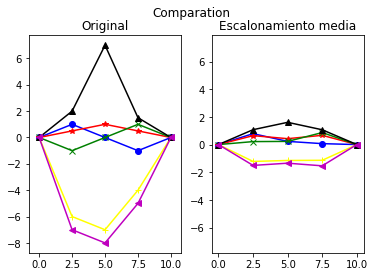

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparation')
# La original
ax1.plot(x, lista[0], '-+', color='yellow');
ax1.plot(x, lista[1], '-o', color='blue');
ax1.plot(x, lista[2], '-*', color='red');
ax1.plot(x, lista[3], '-x', color='green');
ax1.plot(x, lista[4], '-^', color='black');
ax1.plot(x, lista[5], '-<', color='m');
ax1.set_title('Original')
ax1.axis('equal')
# scaled plot
ax2.plot(x, norm_lista[0], '-+', color='yellow');
ax2.plot(x, norm_lista[1], '-o', color='blue');
ax2.plot(x, norm_lista[2], '-*', color='red');
ax2.plot(x, norm_lista[3], '-x', color='green');
ax2.plot(x, norm_lista[4], '-^', color='black');
ax2.plot(x, norm_lista[5], '-<', color='m');
ax2.set_title('Escalonamiento media')
ax2.axis('equal')

## Gráficas con escalamiento Min Max

In [0]:
from sklearn.preprocessing import MinMaxScaler

mM_X = MinMaxScaler()
minMax_lista = mM_X.fit_transform(lista)

print(minMax_lista)

[[0.         0.11111111 0.06666667 0.15384615 0.        ]
 [0.         0.88888889 0.53333333 0.61538462 0.        ]
 [0.         0.83333333 0.6        0.84615385 0.        ]
 [0.         0.66666667 0.53333333 0.92307692 0.        ]
 [0.         1.         1.         1.         0.        ]
 [0.         0.         0.         0.         0.        ]]


(-0.5, 10.5, -0.05, 1.05)

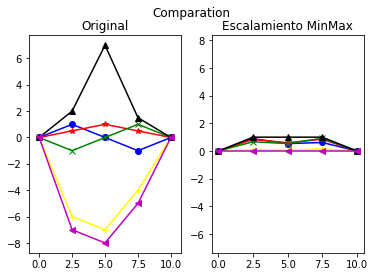

In [0]:
# Graficamos y comparamos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparation')
# La original
ax1.plot(x, lista[0], '-+', color='yellow');
ax1.plot(x, lista[1], '-o', color='blue');
ax1.plot(x, lista[2], '-*', color='red');
ax1.plot(x, lista[3], '-x', color='green');
ax1.plot(x, lista[4], '-^', color='black');
ax1.plot(x, lista[5], '-<', color='m');
ax1.set_title('Original')
ax1.axis('equal')

ax2.plot(x, minMax_lista[0], '-+', color='yellow');
ax2.plot(x, minMax_lista[1], '-o', color='blue');
ax2.plot(x, minMax_lista[2], '-*', color='red');
ax2.plot(x, minMax_lista[3], '-x', color='green');
ax2.plot(x, minMax_lista[4], '-^', color='black');
ax2.plot(x, minMax_lista[5], '-<', color='m');
ax2.set_title('Escalamiento MinMax')
ax2.axis('equal')

# Realizaremos Clusterización para estas 5 curvas. El proceso se hace para las curvas sin escalar y para las escaladas con el método de la media

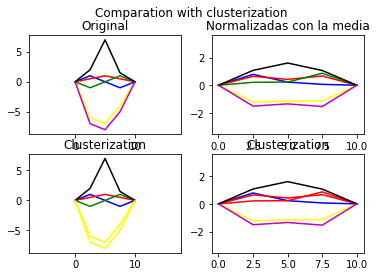

In [0]:
from sklearn.cluster import KMeans

cluster_number = 5
kmeans_model = KMeans(n_clusters = cluster_number)
kmeans_model2 = KMeans(n_clusters = cluster_number)
kmeans_model.fit(lista)
kmeans_model2.fit(norm_lista)
y_km=kmeans_model.labels_
y_km2=kmeans_model2.labels_
 
col=['yellow','blue','red','green','black','m']
col2=col
# procedimiento para pintar con el color correcto, según el cluster
for kk in range(len(y_km)):
  for k in range(len(col)):
    if y_km[k]==y_km[kk]:
      aux=col[kk]
      col2[k]=aux
# No entiendo porque se me cambia col, me tocó escribirlo de nuevo
col=['yellow','blue','red','green','black','m']
col3=col
for kk in range(len(y_km2)):
  for k in range(len(col)):
    if y_km2[k]==y_km2[kk]:
      aux=col[kk]
      col3[k]=aux
#print(col,col2,col3)
# No entiendo porque se me cambia col, me tocó escribirlo de nuevo
col=['yellow','blue','red','green','black','m']

# Pintamos las curvas
fig, axs = plt.subplots(2, 2)
fig.suptitle('Comparation with clusterization')
# Pintamos curvas originales
for k in range(len(lista)):
  axs[0,0].plot(x,lista[k],color=col[k])
  axs[0,0].set_title('Original')
  axs[0,0].axis('equal')
# Pintamos curvas normalizadas con la media
for k in range(len(lista)):
  axs[0,1].plot(x,norm_lista[k],color=col[k])
  axs[0,1].set_title('Normalizadas con la media')
  axs[0,1].axis('equal')
# Pintamos la clusterización de las curvas originales
for k in range(len(lista)):
  axs[1,0].plot(x,lista[k],color=col2[k])
  axs[1,0].set_title('Clusterization')
  axs[1,0].axis('equal')
# Pintamos la clusterización de as curvas normalizadas con la media
for k in range(len(lista)):
  axs[1,1].plot(x,norm_lista[k],color=col3[k])
  axs[1,1].set_title('Clusterization')
  axs[1,1].axis('equal')


# Ahora comparamos las curvas y la clusterización respectiva usando la normalización MaxMin

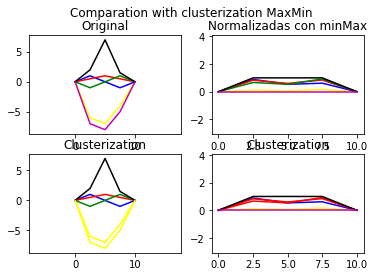

In [0]:
kmeans_model3 = KMeans(n_clusters = cluster_number)
kmeans_model3.fit(minMax_lista)
y_km3=kmeans_model3.labels_
col=['yellow','blue','red','green','black','m']
col4=col
# procedimiento para pintar con el color correcto, según el cluster
for kk in range(len(y_km)):
  for k in range(len(col)):
    if y_km3[k]==y_km3[kk]:
      aux=col[kk]
      col4[k]=aux
# No entiendo porque se me cambia col, me tocó escribirlo de nuevo
col=['yellow','blue','red','green','black','m']

# Pintamos las curvas
fig, axs = plt.subplots(2, 2)
fig.suptitle('Comparation with clusterization MaxMin')
# Curvas originales
for k in range(len(lista)):
  axs[0,0].plot(x,lista[k],color=col[k])
  axs[0,0].set_title('Original')
  axs[0,0].axis('equal')
# Curvas escaladas con minMax
for k in range(len(lista)):
  axs[0,1].plot(x,minMax_lista[k],color=col[k])
  axs[0,1].set_title('Normalizadas con minMax')
  axs[0,1].axis('equal')
# Curvas originales clusterizadas
for k in range(len(lista)):
  axs[1,0].plot(x,lista[k],color=col2[k])
  axs[1,0].set_title('Clusterization')
  axs[1,0].axis('equal')
# Curvas escaladas con MinMax clusterizadas
for k in range(len(lista)):
  axs[1,1].plot(x,minMax_lista[k],color=col4[k])
  axs[1,1].set_title('Clusterization')
  axs[1,1].axis('equal')
